In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2026-01-23 18:27:10.809099: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769192831.012956      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769192831.074673      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769192831.560575      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769192831.560606      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769192831.560609      55 computation_placer.cc:177] computation placer alr

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


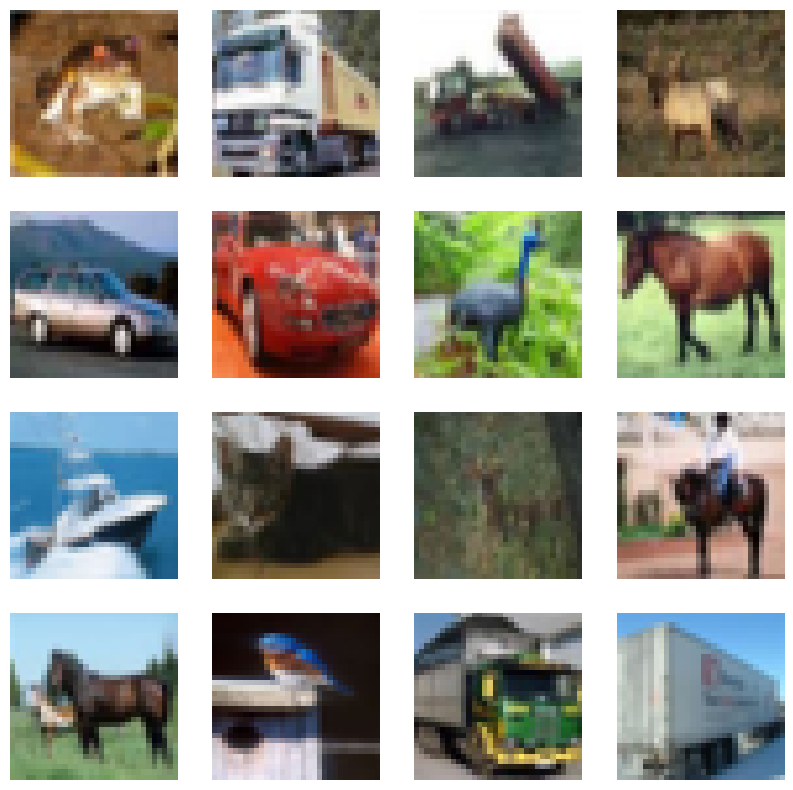

In [2]:
# Load CIFAR-10 dataset for training images
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values for augmentation
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Display a sample of the training images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()

In [3]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
X_train[0].shape, X_train.shape

((32, 32, 3), (50000, 32, 32, 3))

In [5]:
# Data Augmentation (Using ImageDataGenerator)
# def get_data_augmenter(x, y, batch_size):
def get_data_augmenter():
    # This creates a generator configuration

    # def flatten_image(img):
    #     return img.flatten()

    # datagen = ImageDataGenerator(
    #     rotation_range=40,
    #     width_shift_range=0.2,
    #     height_shift_range=0.2,
    #     shear_range=0.2,
    #     zoom_range=0.2,
    #     horizontal_flip=True,
    #     fill_mode='nearest',
    #     preprocessing_function=flatten_image # Flattening happens here
    # )
    
    # return datagen.flow(x, y, batch_size=batch_size)
    
    return ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )

datagen = get_data_augmenter()

In [6]:
# Model Class & Compilation
class CIFARSequentialModel:
    def __init__(self, input_dim=3072):
        self.model = models.Sequential([
            layers.Flatten(input_shape=(32, 32, 3)),
            # layers.Input(shape=(input_dim,)),
            layers.Dense(1024, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(192, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model_wrapper = CIFARSequentialModel()
model = model_wrapper.model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1769192850.290242      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [7]:
# batch_size = 1024
# train_gen = get_data_augmenter(X_train, y_train, batch_size)
# x_test_flat = x_test.reshape(X_test.shape[0], -1)

# # Loop - training for 10 epochs using fit
# print("Training with model.fit...")
# model.fit(
#     train_gen, 
#     steps_per_epoch=len(x_train) // batch_size, 
#     epochs=10,
#     validation_data=(x_test_flat, y_test)
# )

In [9]:
batch_size = 2048

# Loop - training for 10 epochs using fit
print("Training with model.fit...")
model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size), 
    steps_per_epoch=len(X_train) // batch_size, 
    epochs=10,
    validation_data=(X_test, y_test)
)

Training with model.fit...
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.1191 - loss: 2.3195 - val_accuracy: 0.1827 - val_loss: 2.1978
Epoch 2/10
 1/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1714 - loss: 2.2167

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.1714 - loss: 2.2167 - val_accuracy: 0.1810 - val_loss: 2.1935
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 928ms/step - accuracy: 0.1820 - loss: 2.1679 - val_accuracy: 0.2378 - val_loss: 2.0459
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2373 - loss: 2.0570 - val_accuracy: 0.2355 - val_loss: 2.0411
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 919ms/step - accuracy: 0.2288 - loss: 2.0604 - val_accuracy: 0.2726 - val_loss: 1.9865
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.2485 - loss: 2.0565 - val_accuracy: 0.2823 - val_loss: 1.9815
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 922ms/step - accuracy: 0.2641 - loss: 2.0153 - val_accuracy: 0.3172 - val_loss: 1.9193
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2803 - loss: 1.9689 - val_accuracy: 0.3065 - val_loss: 1.9275
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 22s 923ms/step - accuracy: 0.2918 - loss: 1.9590 - val_accuracy: 0.3376 - val_

In [10]:
# Loop - Test the model
print("\nEvaluating Model...")
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {test_acc:.2}")


Evaluating Model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3392 - loss: 1.8531

Final Test Accuracy: 0.34


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


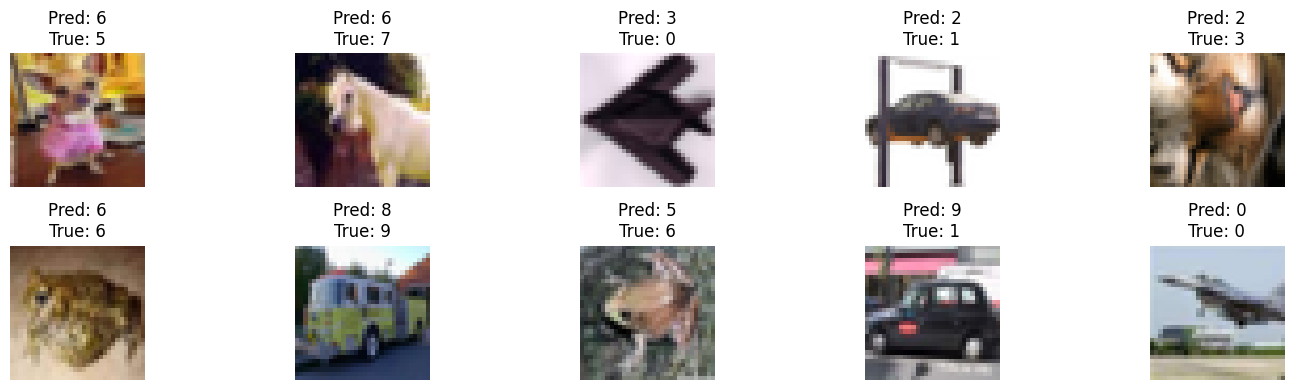

In [11]:
import numpy as np

rng = np.random.default_rng(seed=36)

indices = rng.choice(len(X_test), size=10, replace=False)     # Randomly choose 10 images from the test dataset
probs = model.predict(X_test[indices])                              # Predict the probabilities of class of that handwritten digit
y_pred = np.argmax(probs, axis=1)                                   # Select the highest prob index

plt.figure(figsize=(15, 4))

for i, idx in enumerate(indices):
    image = X_test[idx].reshape(32, 32, 3)                             # reshape the flattened 1-D data into 2-D image
    true_label = y_test[idx][0]
    pred_label = y_pred[i]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()